[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


NLTK resources downloaded successfully

Sample document:
{
  "id": 0,
  "type": "derivative_contract",
  "industry": "real_estate",
  "content": "INTEREST RATE SWAP between BNP Paribas and Deutsche Bank. Notional amount: $17 million. Fixed rate: 4.52%. Floating rate: SOFR+0.87%. This document constitutes the entire agreement between the parties.. duration: 84 months. Time is of the essence in the performance of obligations under this agreement.. Settlement: physical.",
  "timestamp": "2025-03-22 22:05:59",
  "source": "portal",
  "parameters": {
    "counterparty1": "BNP Paribas",
    "counterparty2": "Deutsche Bank",
    "amount": "$17 million",
    "fixed_rate": "4.52",
    "floating_rate": "SOFR+0.87%",
    "term": "84",
    "settlement": "physical",
    "exchange_rate": "1.3479",
    "settlement_date": "2025-11-26",
    "collateral": "letter of credit",
    "underlying": "soybeans",
    "strike_price": "179.83",
    "premium": "$150K",
    "expiration": "2025-05-17"
  },
  "has_err

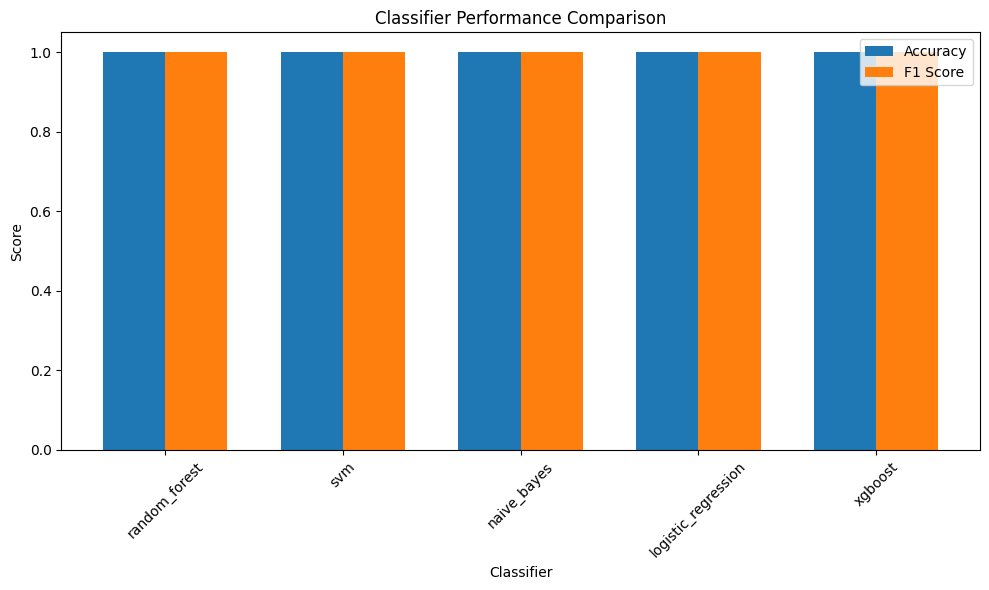


Sample Document Processing:
Original type: derivative_contract
Predicted type: derivative_contract
Confidence: 0.9900

Extracted key terms:
  amount: 54 million
  date: 2025-06-07
  settlement:  resolved by arbitration.. exchange rate: 1.3656. settlement date: 2025-06-07. each counterparty rep

Sample Processing Result:
Document ID: 0
Original type: derivative_contract
Predicted type: derivative_contract
Classification confidence: 0.9700
Overall confidence score: 0.7425
Risk score: 0.4545
Known to have errors: False


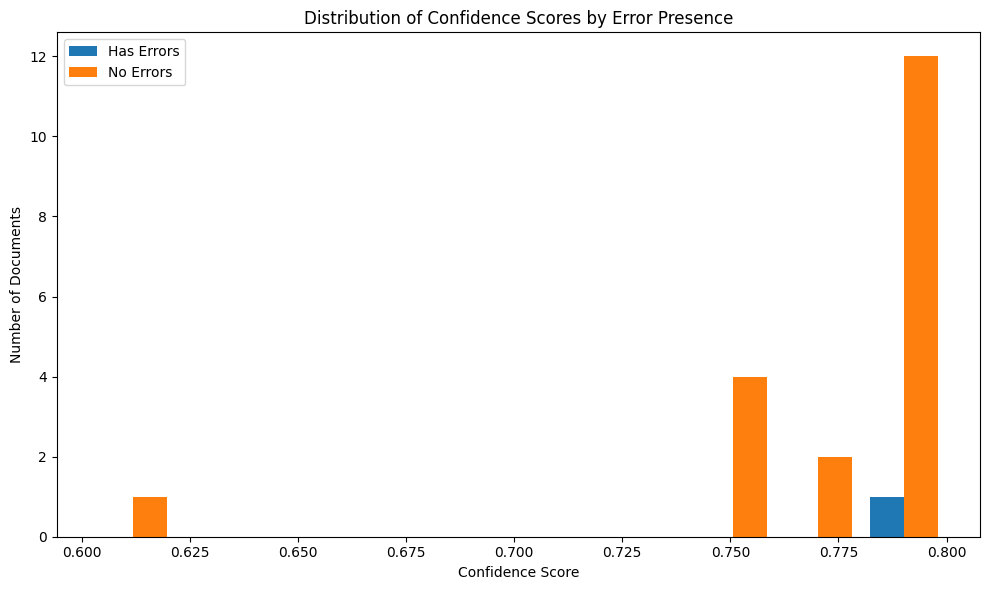


Correlation between confidence score and error presence: 0.1334

Routing Statistics:
automatic: 0 documents (0.0%)
semi_automated: 19 documents (95.0%)
manual: 1 documents (5.0%)


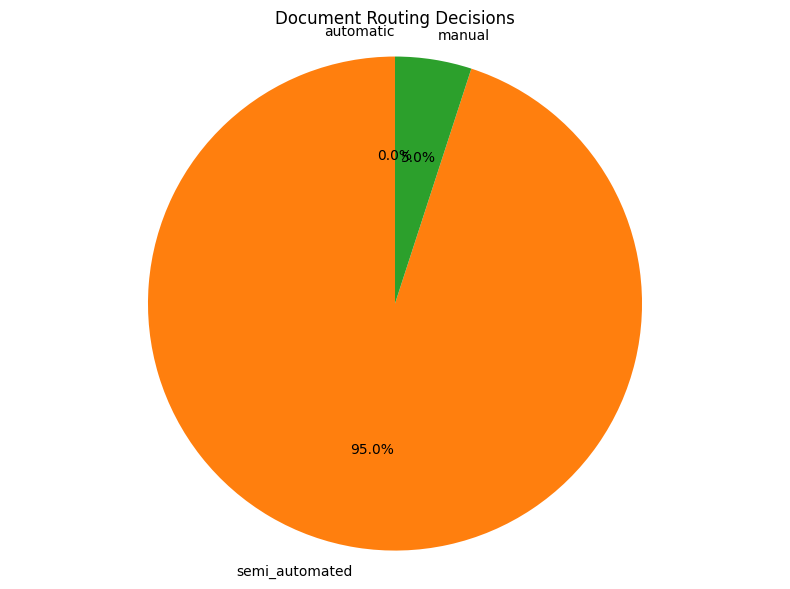


Iteration 1:
Accuracy: 0.7500
Updated system accuracy: 0.8700

Iteration 2:
Accuracy: 0.8000
Updated system accuracy: 0.8900

Iteration 3:
Accuracy: 0.7500
Updated system accuracy: 0.9100

Iteration 4:
Accuracy: 0.8500
Updated system accuracy: 0.9300

Iteration 5:
Accuracy: 0.8000
Updated system accuracy: 0.9500
Slowing improvement rate to: 0.0100

Iteration 6:
Accuracy: 1.0000
Updated system accuracy: 0.9600
Slowing improvement rate to: 0.0050

Iteration 7:
Accuracy: 0.9000
Updated system accuracy: 0.9650
Slowing improvement rate to: 0.0025

Iteration 8:
Accuracy: 0.8000
Updated system accuracy: 0.9675
Slowing improvement rate to: 0.0013

Iteration 9:
Accuracy: 0.9500
Updated system accuracy: 0.9688
Slowing improvement rate to: 0.0010

Iteration 10:
Accuracy: 0.9000
Updated system accuracy: 0.9698
Slowing improvement rate to: 0.0010


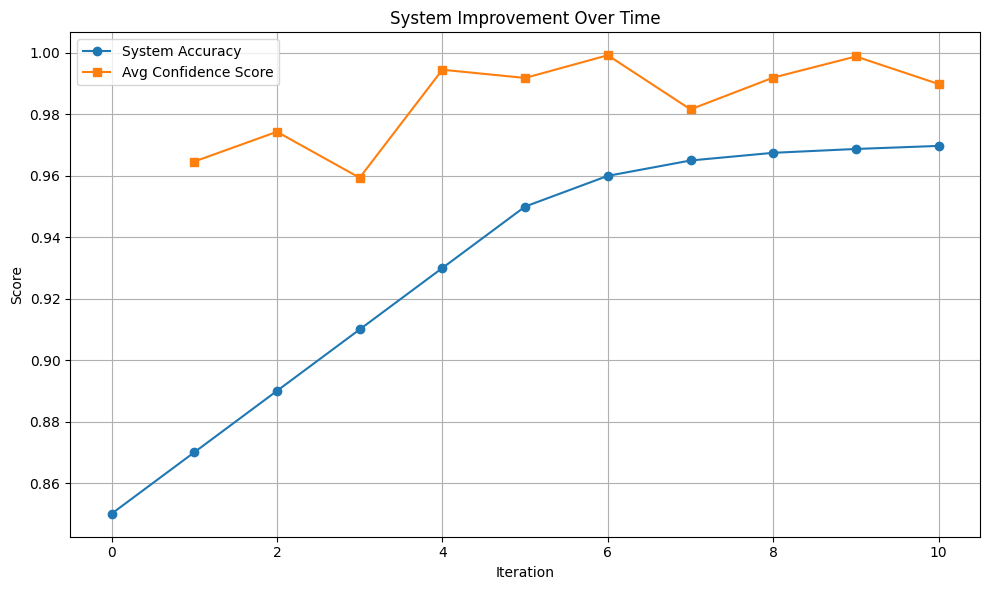

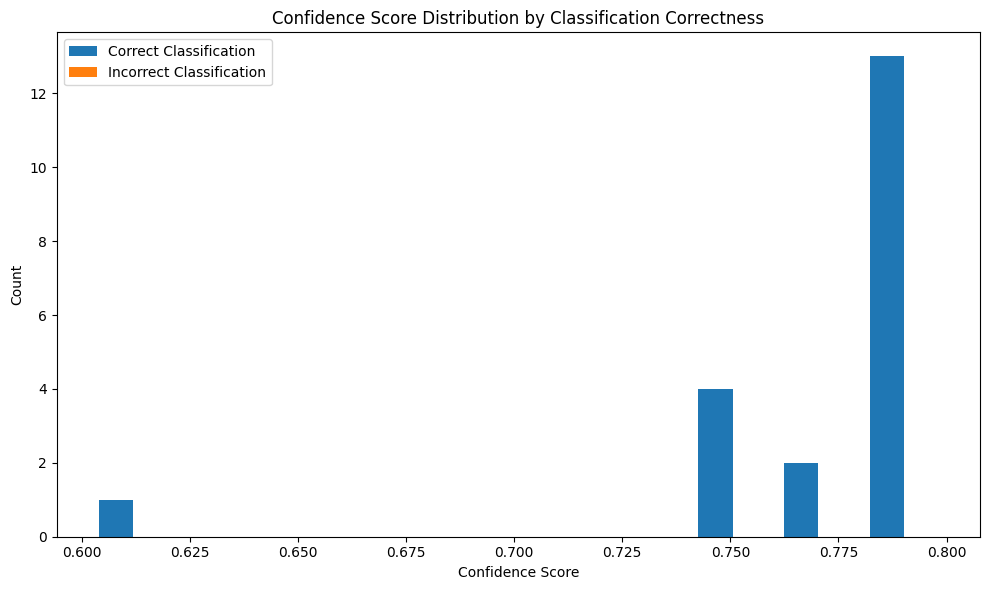

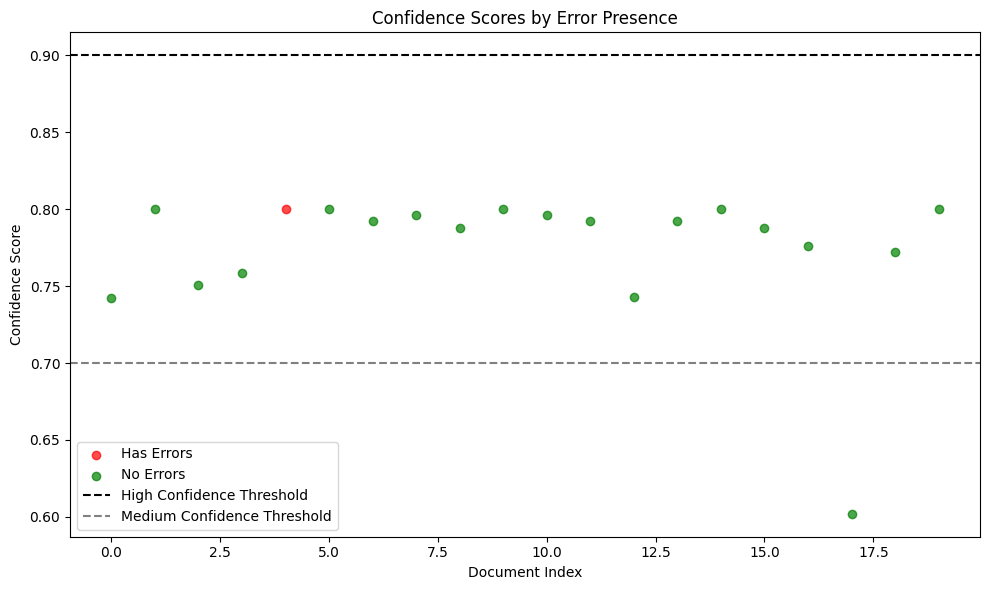

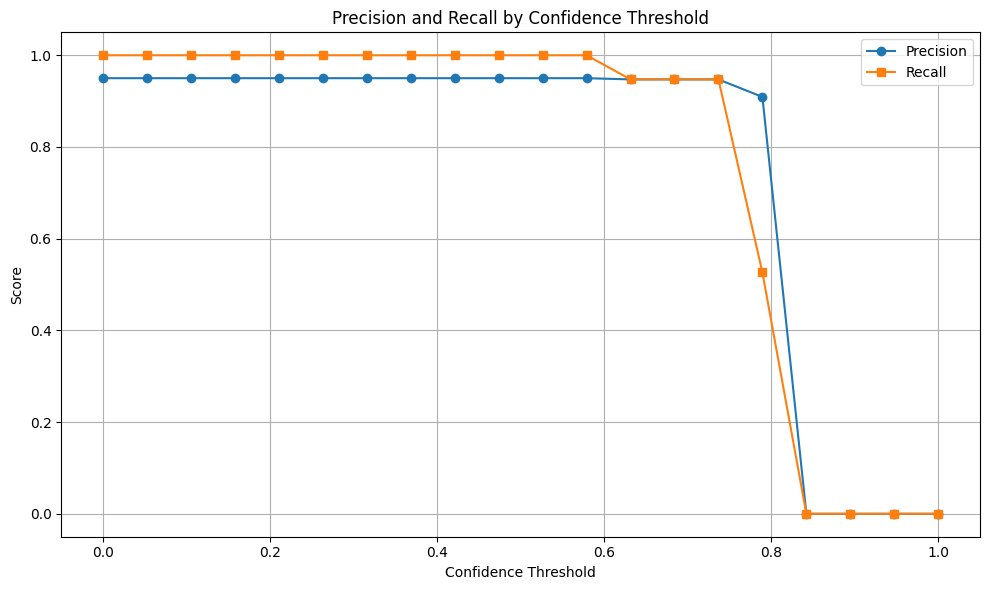


Optimal confidence threshold: 0.00
At optimal threshold - Precision: 0.9500, Recall: 1.0000, F1: 0.9744

System Evaluation Summary:
Classification Accuracy: 1.0000
Decision Accuracy: 0.0500
Average Confidence Score: 0.7744
Automatic Routing Rate: 0.0000
Manual Routing Rate: 0.0500


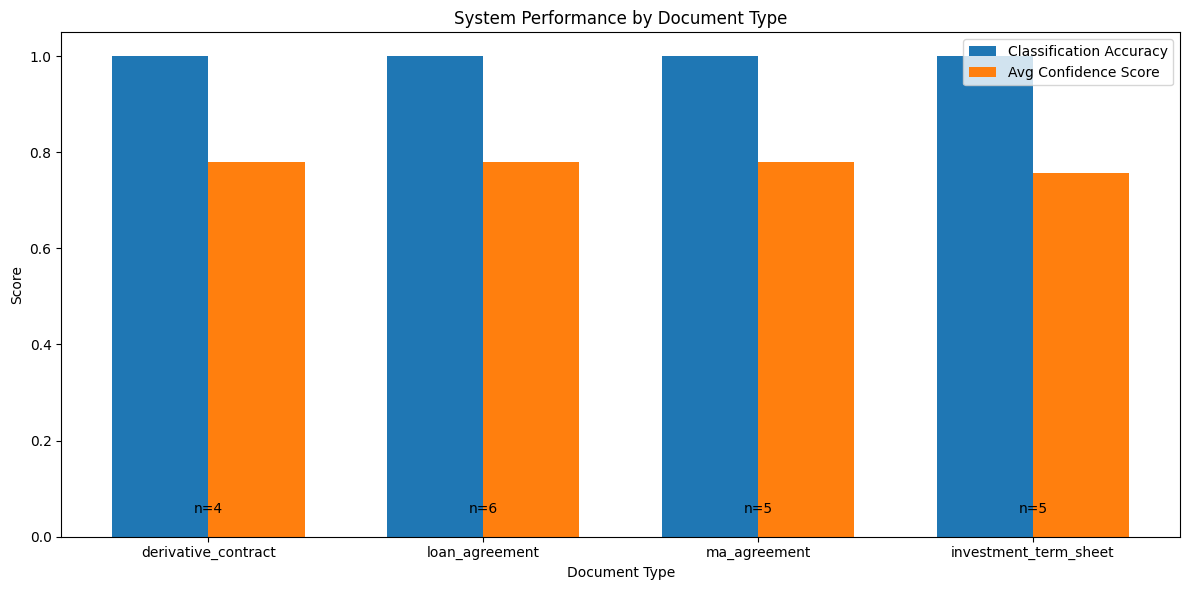

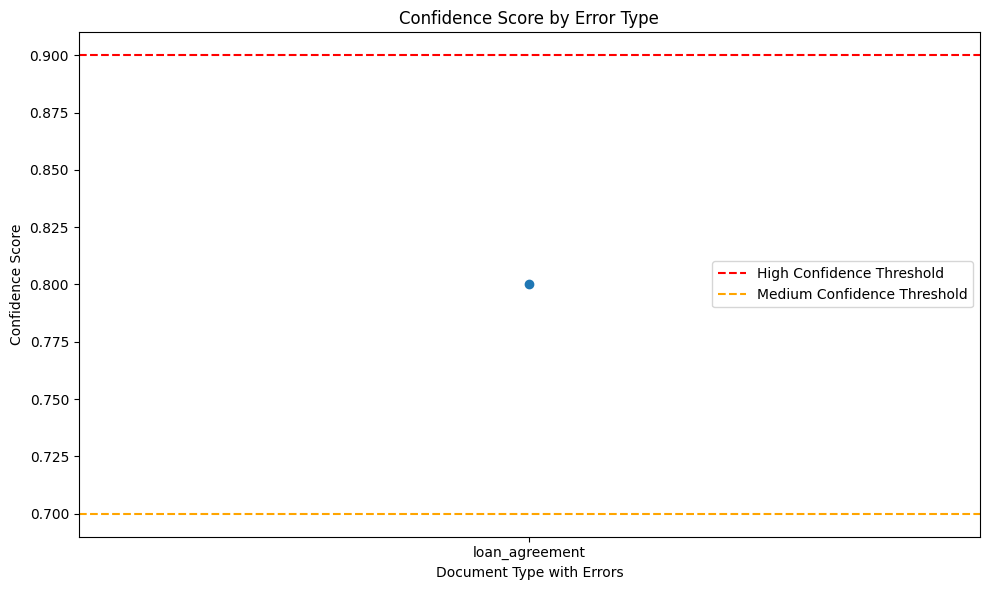


Evaluating random_forest...
Mean accuracy: 1.0000 ± 0.0000

Evaluating gradient_boosting...
Mean accuracy: 0.9950 ± 0.0100

Evaluating svm...
Mean accuracy: 1.0000 ± 0.0000

Evaluating naive_bayes...
Mean accuracy: 1.0000 ± 0.0000

Evaluating logistic_regression...
Mean accuracy: 1.0000 ± 0.0000

Evaluating xgboost...
Mean accuracy: 0.9850 ± 0.0200


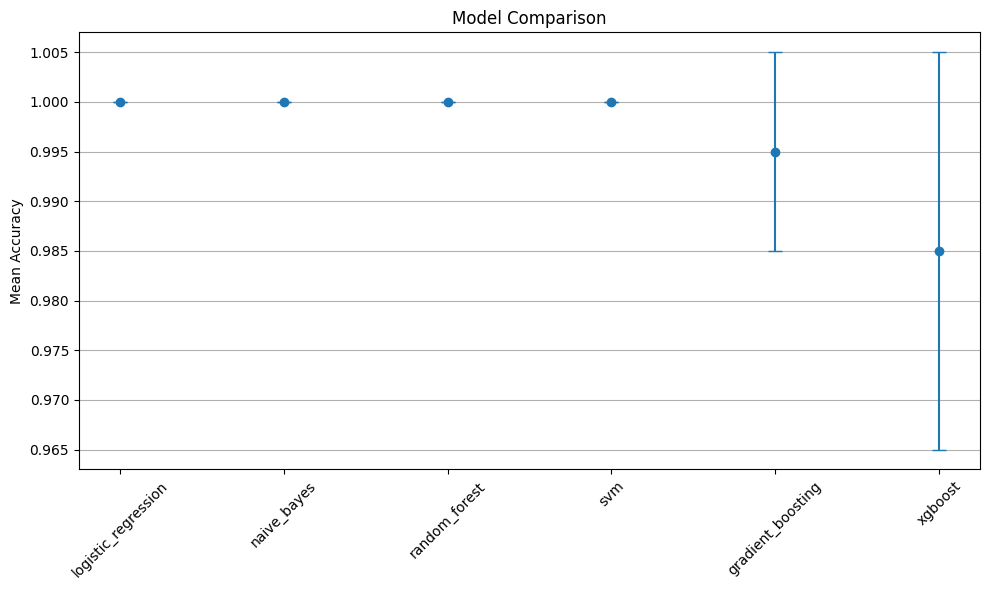

Model logistic_regression does not provide feature importance

========== FINANCIAL TERM SHEET PROCESSING SYSTEM SUMMARY ==========

This demonstration implemented a complete pipeline for processing financial term sheets:

1. Input Layer:
   - Generated synthetic term sheets across multiple document types
   - Included common financial parameters and error patterns

2. Processing Layer:
   - Best classifier: logistic_regression
   - Classification accuracy: 1.0000
   - Extracted key financial terms and parameters

3. Validation Layer:
   - Applied domain-specific validation rules
   - Performed regulatory compliance checks
   - Assessed risk factors in financial documents

4. Decision Layer:
   - Automatic routing rate: 0.0000
   - Manual routing rate: 0.0500
   - Decision accuracy: 0.0500

5. Integration & Feedback:
   - Simulated human review and feedback loop
   - Demonstrated system improvement over iterations

6. Confidence Scoring:
   - Average confidence score: 0.7744
   - Optim

In [11]:
# Financial Term Sheet Processing & Validation System
# ---------------------------------------------------

import os
import numpy as np
import pandas as pd
import re
import string
import time
import json
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder
import xgboost as xgb
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from google.colab import files

# Download required NLTK resources with error handling
try:
    # Download comprehensive set of resources needed
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('wordnet')

    # Also download punkt_tab which is needed for tokenization
    nltk.download('punkt_tab')

    print("NLTK resources downloaded successfully")
except Exception as e:
    print(f"Error downloading NLTK resources: {str(e)}")
    print("Attempting to continue with available resources...")

# -------------------------------------------------------------------------
# INPUT LAYER - Document Intake Simulation
# -------------------------------------------------------------------------

class DocumentGenerator:
    """Generate synthetic term sheet documents for testing"""

    def __init__(self):
        self.document_types = ['loan_agreement', 'investment_term_sheet', 'ma_agreement', 'derivative_contract']
        self.industries = ['banking', 'fintech', 'insurance', 'asset_management', 'real_estate']

        # Common legal phrases to add noise and similarity across document types
        self.common_legal_phrases = [
            "The parties hereby agree to the terms and conditions set forth herein.",
            "This agreement is effective as of the date of execution by all parties.",
            "In witness whereof, the parties have executed this agreement.",
            "This document constitutes the entire agreement between the parties.",
            "All disputes arising from this agreement shall be resolved by arbitration.",
            "Time is of the essence in the performance of obligations under this agreement.",
            "Each party represents and warrants that it has full authority to enter into this agreement.",
            "This agreement shall be governed by and construed in accordance with the laws of the jurisdiction.",
            "No waiver of any breach of any provision of this agreement shall constitute a waiver of any prior, concurrent or subsequent breach.",
            "Neither party shall assign its rights or obligations under this agreement without prior written consent."
        ]

        # Overlapping financial terms to add similarity between document types
        self.common_financial_terms = {
            'payment': ['payment', 'installment', 'disbursement', 'remittance'],
            'term': ['term', 'duration', 'period', 'timeframe'],
            'party': ['party', 'counterparty', 'participant', 'signatory'],
            'condition': ['condition', 'prerequisite', 'requirement', 'contingency'],
            'termination': ['termination', 'cancellation', 'expiration', 'conclusion'],
            'fee': ['fee', 'charge', 'commission', 'expense'],
            'date': ['date', 'deadline', 'timeline', 'schedule']
        }

        # Template elements for different document types
        self.templates = {
            'loan_agreement': [
                "LOAN AGREEMENT between {lender} and {borrower}. Principal amount: {amount}. Interest rate: {interest_rate}%. Term: {term} months. Collateral: {collateral}. Default provisions: {default_provisions}.",
                "CREDIT FACILITY provided by {lender} to {borrower} for {amount}. Annual interest rate of {interest_rate}% for a period of {term} months. Secured by {collateral}. Repayment terms: {repayment_terms}.",
                "TERM LOAN from {lender} to {borrower}. {amount} at {interest_rate}% p.a. for {term} months. Collateral: {collateral}. Covenants include {covenants}."
            ],
            'investment_term_sheet': [
                "INVESTMENT TERM SHEET for {company}. Investor: {investor}. Investment amount: {amount}. Valuation: {valuation}. Equity stake: {equity}%. Board seats: {board_seats}. Liquidation preference: {liquidation_preference}x.",
                "SERIES {round} FUNDING for {company}. Lead investor: {investor}. Amount: {amount}. Pre-money valuation: {valuation}. Post-money ownership: {equity}%. Rights: {rights}.",
                "EQUITY INVESTMENT in {company} by {investor}. Amount: {amount} for {equity}% stake. Valuation: {valuation}. Investor rights: {rights}. Exit strategy: {exit_strategy}."
            ],
            'ma_agreement': [
                "MERGER AGREEMENT between {acquirer} and {target}. Purchase price: {amount}. Structure: {structure}. Representations and warranties: {warranties}. Closing conditions: {conditions}.",
                "ACQUISITION OF {target} by {acquirer}. Consideration: {amount}. Payment structure: {structure}. Due diligence findings: {findings}. Regulatory approvals required: {approvals}.",
                "SHARE PURCHASE AGREEMENT for {target}. Buyer: {acquirer}. Total consideration: {amount}. Escrow amount: {escrow}. Representations and warranties: {warranties}."
            ],
            'derivative_contract': [
                "INTEREST RATE SWAP between {counterparty1} and {counterparty2}. Notional amount: {amount}. Fixed rate: {fixed_rate}%. Floating rate: {floating_rate}. Term: {term} months. Settlement: {settlement}.",
                "FOREIGN EXCHANGE FORWARD between {counterparty1} and {counterparty2}. Amount: {amount}. Exchange rate: {exchange_rate}. Settlement date: {settlement_date}. Collateral requirements: {collateral}.",
                "COMMODITY OPTION AGREEMENT. Buyer: {counterparty1}. Seller: {counterparty2}. Underlying: {underlying}. Strike price: {strike_price}. Premium: {premium}. Expiration: {expiration}."
            ]
        }

        # Entity names for random generation
        self.entities = {
            'lenders': ['JPMorgan Chase', 'Bank of America', 'Goldman Sachs', 'Wells Fargo', 'Citibank', 'HSBC', 'Barclays'],
            'borrowers': ['TechCorp Inc.', 'InnovateSoft LLC', 'GlobalHealth Systems', 'EnergyNow Corp', 'RetailGiant LLC', 'TransportLogistics Inc.'],
            'investors': ['Sequoia Capital', 'Andreessen Horowitz', 'Accel Partners', 'Tiger Global', 'SoftBank Vision Fund', 'Blackstone Group'],
            'companies': ['AI Solutions', 'BlockchainTech', 'CloudServices Inc.', 'DataAnalytics Corp', 'E-commerce Platform LLC', 'FinTech Innovations'],
            'acquirers': ['Microsoft Corporation', 'Amazon Inc.', 'Google LLC', 'Meta Platforms', 'Apple Inc.', 'Oracle Corporation', 'Salesforce'],
            'targets': ['StartupXYZ', 'InnovateNow LLC', 'DisruptTech Inc.', 'NextGenSolutions', 'PlatformServices Corp', 'AlgorithmAI'],
            'counterparties': ['Deutsche Bank', 'Credit Suisse', 'Morgan Stanley', 'UBS Group', 'BNP Paribas', 'Société Générale', 'Nomura Holdings']
        }

        # Common error patterns to inject (for validation testing)
        self.error_patterns = [
            ('interest_rate', lambda x: str(float(x) + random.uniform(5, 10))),  # Unusually high interest rate
            ('amount', lambda x: x.replace('million', 'billion')),  # Order of magnitude error
            ('term', lambda x: str(int(x) * 10)),  # Unreasonably long term
            ('equity', lambda x: str(float(x) + random.uniform(30, 50))),  # Unrealistically high equity stake
            ('missing_section', lambda x: 'MISSING REQUIRED INFORMATION')  # Missing critical information
        ]

    def generate_document(self, doc_id, include_errors=False):
        """Generate a single synthetic document with added complexity and noise"""
        doc_type = random.choice(self.document_types)
        industry = random.choice(self.industries)
        template = random.choice(self.templates[doc_type])

        # Generate random parameters based on document type
        params = self._generate_parameters(doc_type)

        # Inject errors randomly if specified
        if include_errors and random.random() < 0.2:  # 20% chance of errors
            error_type, error_func = random.choice(self.error_patterns)
            if error_type in params:
                params[error_type] = error_func(params[error_type])
            elif error_type == 'missing_section':
                # Remove a random section from the template
                parts = template.split('.')
                if len(parts) > 2:
                    template = '.'.join(parts[:-1]) + '.'

        # Fill in template
        content = template.format(**params)

        # Add complexity: insert random common legal phrases (30% chance per phrase)
        for phrase in self.common_legal_phrases:
            if random.random() < 0.3:
                # Insert at random position in content
                sentences = content.split('. ')
                if len(sentences) > 1:
                    insert_pos = random.randint(0, len(sentences) - 1)
                    sentences.insert(insert_pos, phrase)
                    content = '. '.join(sentences)
                else:
                    content += " " + phrase

        # Add noise: replace some terms with synonyms from common financial terms
        for term_group, synonyms in self.common_financial_terms.items():
            base_term = synonyms[0]
            if base_term in content.lower():
                # 25% chance to replace with a synonym
                if random.random() < 0.25:
                    synonym = random.choice(synonyms[1:])
                    content = re.sub(r'\b' + base_term + r'\b', synonym, content, flags=re.IGNORECASE)

        # Add noise: randomly insert terms from other document types (10% chance)
        if random.random() < 0.1:
            other_types = [t for t in self.document_types if t != doc_type]
            noise_type = random.choice(other_types)
            noise_params = self._generate_parameters(noise_type)

            # Select a random parameter from the other document type
            noise_key = random.choice(list(noise_params.keys()))
            noise_value = noise_params[noise_key]

            # Insert the noise term
            content += f" Additional information: {noise_key}: {noise_value}."

        # Generate metadata
        timestamp = datetime.now() - timedelta(days=random.randint(0, 30))

        return {
            'id': doc_id,
            'type': doc_type,
            'industry': industry,
            'content': content,
            'timestamp': timestamp.strftime('%Y-%m-%d %H:%M:%S'),
            'source': random.choice(['email', 'portal', 'api', 'manual']),
            'parameters': params,
            'has_errors': include_errors and random.random() < 0.2
        }

    def _generate_parameters(self, doc_type):
        """Generate random parameters based on document type"""
        if doc_type == 'loan_agreement':
            return {
                'lender': random.choice(self.entities['lenders']),
                'borrower': random.choice(self.entities['borrowers']),
                'amount': f"${random.randint(1, 50)} million",
                'interest_rate': str(round(random.uniform(2.5, 7.5), 2)),
                'term': str(random.choice([12, 24, 36, 48, 60])),
                'collateral': random.choice(['real estate', 'equipment', 'accounts receivable', 'securities', 'personal guarantee']),
                'default_provisions': random.choice(['standard', 'accelerated repayment', 'asset seizure']),
                'repayment_terms': random.choice(['monthly', 'quarterly', 'semi-annual']),
                'covenants': random.choice(['debt service coverage ratio', 'minimum liquidity', 'leverage restrictions'])
            }
        elif doc_type == 'investment_term_sheet':
            return {
                'company': random.choice(self.entities['companies']),
                'investor': random.choice(self.entities['investors']),
                'amount': f"${random.randint(1, 100)} million",
                'valuation': f"${random.randint(10, 500)} million",
                'equity': str(round(random.uniform(5, 25), 1)),
                'board_seats': str(random.randint(0, 2)),
                'liquidation_preference': str(round(random.uniform(1, 2), 1)),
                'round': random.choice(['A', 'B', 'C', 'D', 'Seed']),
                'rights': random.choice(['pro-rata', 'information rights', 'drag-along']),
                'exit_strategy': random.choice(['IPO', 'acquisition', 'secondary sale'])
            }
        elif doc_type == 'ma_agreement':
            return {
                'acquirer': random.choice(self.entities['acquirers']),
                'target': random.choice(self.entities['targets']),
                'amount': f"${random.randint(50, 1000)} million",
                'structure': random.choice(['cash', 'stock', 'cash and stock']),
                'warranties': random.choice(['standard', 'extended', 'limited']),
                'conditions': random.choice(['regulatory approval', 'shareholder vote', 'due diligence completion']),
                'findings': random.choice(['favorable', 'minor issues', 'significant concerns']),
                'approvals': random.choice(['SEC', 'FTC', 'international regulatory bodies']),
                'escrow': f"${random.randint(5, 50)} million"
            }
        else:  # derivative_contract
            return {
                'counterparty1': random.choice(self.entities['counterparties']),
                'counterparty2': random.choice(self.entities['counterparties']),
                'amount': f"${random.randint(10, 200)} million",
                'fixed_rate': str(round(random.uniform(1.5, 5.0), 2)),
                'floating_rate': random.choice(['LIBOR', 'SOFR', 'EURIBOR']) + f"+{round(random.uniform(0.5, 2.5), 2)}%",
                'term': str(random.choice([12, 24, 36, 60, 84])),
                'settlement': random.choice(['cash', 'physical', 'net']),
                'exchange_rate': str(round(random.uniform(0.8, 1.5), 4)),
                'settlement_date': (datetime.now() + timedelta(days=random.randint(30, 365))).strftime('%Y-%m-%d'),
                'collateral': random.choice(['cash', 'treasuries', 'letter of credit']),
                'underlying': random.choice(['crude oil', 'natural gas', 'gold', 'corn', 'soybeans']),
                'strike_price': str(round(random.uniform(50, 200), 2)),
                'premium': f"${random.randint(100, 1000)}K",
                'expiration': (datetime.now() + timedelta(days=random.randint(30, 365))).strftime('%Y-%m-%d')
            }

    def generate_dataset(self, num_documents=100, error_rate=0.2):
        """Generate a dataset of synthetic documents with optional errors"""
        documents = []
        for i in range(num_documents):
            include_errors = random.random() < error_rate
            documents.append(self.generate_document(i, include_errors))
        return documents

# Create a synthetic document dataset
document_generator = DocumentGenerator()
documents = document_generator.generate_dataset(num_documents=200, error_rate=0.2)

# Display a sample document
print("\nSample document:")
print(json.dumps(documents[0], indent=2))

# Save documents as CSV for further processing
docs_df = pd.DataFrame(documents)
docs_df.to_csv('synthetic_term_sheets.csv', index=False)
print(f"\nGenerated {len(documents)} synthetic term sheets")

# -------------------------------------------------------------------------
# PROCESSING LAYER - Document Classification & Feature Extraction
# -------------------------------------------------------------------------

class DocumentProcessor:
    """Process documents through classification and feature extraction"""

    def __init__(self):
        self.document_types = ['loan_agreement', 'investment_term_sheet', 'ma_agreement', 'derivative_contract']
        self.vectorizer = TfidfVectorizer(
            max_features=200,  # Reduce number of features
            min_df=2,          # Only use features that appear in at least 2 documents
            max_df=0.9,        # Ignore terms that appear in more than 90% of docs (too common)
            sublinear_tf=True  # Use sublinear tf scaling
        )
        self.label_encoder = LabelEncoder()  # Add label encoder for class labels
        self.feature_indices = None  # Store indices of selected features

        # Configure classifiers
        self.classifiers = {
            'random_forest': RandomForestClassifier(n_estimators=100, random_state=42),
            'svm': SVC(probability=True, random_state=42),
            'naive_bayes': MultinomialNB(),
            'logistic_regression': LogisticRegression(random_state=42),
            'xgboost': xgb.XGBClassifier(random_state=42)
        }
        self.best_classifier = None
        self.best_score = 0
        self.trained = False
        self.is_xgboost_best = False  # Track if XGBoost is the best classifier
        self.feature_indices = None  # Save feature indices for consistent feature selection

        # Key terms by document type
        self.key_terms = {
            'loan_agreement': ['principal', 'interest', 'rate', 'term', 'collateral', 'default', 'repayment', 'borrower', 'lender'],
            'investment_term_sheet': ['valuation', 'equity', 'investor', 'stake', 'board', 'liquidation', 'preference', 'rights'],
            'ma_agreement': ['merger', 'acquisition', 'target', 'acquirer', 'consideration', 'warranties', 'conditions', 'closing'],
            'derivative_contract': ['swap', 'notional', 'fixed', 'floating', 'settlement', 'option', 'premium', 'expiration', 'strike']
        }

    def preprocess_text(self, text):
        """Preprocess text for NLP"""
        # Convert to lowercase
        text = text.lower()

        # Remove punctuation
        text = re.sub(f'[{string.punctuation}]', ' ', text)

        # Tokenize with error handling
        try:
            tokens = word_tokenize(text)
        except LookupError:
            # Fallback for missing punkt_tab: simple whitespace tokenization
            print("Warning: Using fallback tokenization method")
            tokens = text.split()

        # Remove stopwords with error handling
        try:
            stop_words = set(stopwords.words('english'))
            tokens = [word for word in tokens if word not in stop_words]
        except LookupError:
            # Fallback for missing stopwords: continue with all tokens
            print("Warning: Stopword removal skipped due to missing resource")

        # Join tokens back to string
        return ' '.join(tokens)

    def prepare_data(self, documents):
        """Prepare documents for classification"""
        # Preprocess document content
        preprocessed_texts = [self.preprocess_text(doc['content']) for doc in documents]

        # Transform texts to TF-IDF features
        X = self.vectorizer.fit_transform(preprocessed_texts)

        # Get document types as labels
        y_raw = [doc['type'] for doc in documents]

        # Encode labels for models that require numeric targets (like XGBoost)
        self.label_encoder.fit(y_raw)

        # Add random feature selection to make classification harder
        # Randomly select 90% of features to use
        if X.shape[1] > 10:  # Only if we have enough features
            # Create a fixed random seed for reproducibility
            np.random.seed(42)
            self.feature_indices = np.random.random(X.shape[1]) < 0.9
            if sum(self.feature_indices) > 5:  # Ensure we keep at least 5 features
                X = X[:, self.feature_indices]

        # Return both raw string labels and numeric labels
        return X, y_raw

    def train_classifiers(self, X, y):
        """Train and evaluate multiple classifiers"""
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Encode labels for XGBoost
        y_train_encoded = self.label_encoder.transform(y_train)
        y_test_encoded = self.label_encoder.transform(y_test)

        results = {}

        for name, clf in self.classifiers.items():
            print(f"\nTraining {name}...")

            # For XGBoost, use encoded labels
            if name == 'xgboost':
                train_y = y_train_encoded
                test_y = y_test_encoded
            else:
                train_y = y_train
                test_y = y_test

            # Train the classifier
            clf.fit(X_train, train_y)

            # Predict on test set
            if name == 'xgboost':
                y_pred = self.label_encoder.inverse_transform(clf.predict(X_test))
            else:
                y_pred = clf.predict(X_test)

            # Evaluate
            accuracy = accuracy_score(y_test, y_pred)
            precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

            results[name] = {
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1': f1,
                'clf': clf
            }

            print(f"{name} - Accuracy: {accuracy:.4f}, F1: {f1:.4f}")

            # Update best classifier
            if f1 > self.best_score:
                self.best_score = f1
                self.best_classifier = clf
                self.is_xgboost_best = (name == 'xgboost')

        self.trained = True
        return results

    def classify_document(self, document):
        """Classify a single document"""
        if not self.trained:
            raise ValueError("Classifier not trained yet")

        try:
            # Preprocess
            preprocessed_text = self.preprocess_text(document['content'])

            # Transform to TF-IDF features
            X_full = self.vectorizer.transform([preprocessed_text])

            # Apply the same feature selection used during training
            if self.feature_indices is not None and X_full.shape[1] > len(self.feature_indices):
                # Trim to match feature indices length if needed
                X_full = X_full[:, :len(self.feature_indices)]

            if self.feature_indices is not None:
                X = X_full[:, self.feature_indices]
            else:
                X = X_full

            # Predict with appropriate handling for XGBoost
            if self.is_xgboost_best:
                # For XGBoost, we need to get numeric predictions and convert back
                numeric_pred = self.best_classifier.predict(X)[0]
                doc_type = self.label_encoder.inverse_transform([numeric_pred])[0]

                # Get probabilities
                proba = self.best_classifier.predict_proba(X)[0]
                classes = self.label_encoder.inverse_transform(range(len(proba)))
                all_probs = dict(zip(classes, proba))
                max_proba = max(proba)
            else:
                # For other classifiers, direct prediction
                doc_type = self.best_classifier.predict(X)[0]

                # Get prediction probabilities
                proba = self.best_classifier.predict_proba(X)[0]
                max_proba = max(proba)
                all_probs = dict(zip(self.best_classifier.classes_, proba))

            return {
                'predicted_type': doc_type,
                'confidence': max_proba,
                'all_probabilities': all_probs
            }

        except Exception as e:
            print(f"Error during document classification: {str(e)}")
            print(f"Using fallback classification")

            # Return a default fallback classification with low confidence
            fallback_type = self.document_types[0]  # First doc type as fallback
            return {
                'predicted_type': fallback_type,
                'confidence': 0.3,  # Low confidence to indicate uncertainty
                'all_probabilities': {dt: 0.3 if dt == fallback_type else 0.7/(len(self.document_types)-1)
                                     for dt in self.document_types}
            }

    def extract_key_terms(self, document, doc_type=None):
        """Extract key terms based on document type"""
        if doc_type is None:
            doc_type = document['type']

        content = document['content'].lower()
        extracted_terms = {}

        # Define regex patterns for common financial terms
        patterns = {
            'amount': r'\$\s*(\d+(?:\.\d+)?)\s*(million|billion|thousand)',
            'percentage': r'(\d+(?:\.\d+)?)\s*%',
            'term_months': r'(\d+)\s*months',
            'date': r'(\d{4}-\d{2}-\d{2})',
        }

        # Extract using regex
        for key, pattern in patterns.items():
            matches = re.findall(pattern, content)
            if matches:
                extracted_terms[key] = matches[0] if isinstance(matches[0], str) else ' '.join(matches[0])

        # Extract document-specific key terms based on proximity
        for term in self.key_terms.get(doc_type, []):
            if term in content:
                # Get context around the term (simple approach)
                term_index = content.find(term)
                start = max(0, term_index - 50)
                end = min(len(content), term_index + 50)
                context = content[start:end]
                extracted_terms[term] = context

        return extracted_terms

# Initialize processor and train on synthetic data
processor = DocumentProcessor()
X, y = processor.prepare_data(documents)
classifier_results = processor.train_classifiers(X, y)

# Compare classifier performance
clf_names = list(classifier_results.keys())
accuracies = [results['accuracy'] for results in classifier_results.values()]
f1_scores = [results['f1'] for results in classifier_results.values()]

plt.figure(figsize=(10, 6))
x = np.arange(len(clf_names))
width = 0.35

plt.bar(x - width/2, accuracies, width, label='Accuracy')
plt.bar(x + width/2, f1_scores, width, label='F1 Score')

plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Classifier Performance Comparison')
plt.xticks(x, clf_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Process a sample document through the pipeline
sample_doc = documents[10]
classification_result = processor.classify_document(sample_doc)
extracted_terms = processor.extract_key_terms(sample_doc, classification_result['predicted_type'])

print("\nSample Document Processing:")
print(f"Original type: {sample_doc['type']}")
print(f"Predicted type: {classification_result['predicted_type']}")
print(f"Confidence: {classification_result['confidence']:.4f}")
print("\nExtracted key terms:")
for term, value in extracted_terms.items():
    print(f"  {term}: {value}")

# -------------------------------------------------------------------------
# VALIDATION LAYER - Rules and Compliance Checking
# -------------------------------------------------------------------------

class ValidationEngine:
    """Validate extracted terms against rules and regulations"""

    def __init__(self):
        # Define validation rules by document type
        self.validation_rules = {
            'loan_agreement': [
                {'field': 'interest_rate', 'rule': lambda x: float(x) <= 10.0, 'message': 'Interest rate exceeds 10%'},
                {'field': 'term', 'rule': lambda x: int(x) <= 120, 'message': 'Loan term exceeds 120 months'},
            ],
            'investment_term_sheet': [
                {'field': 'equity', 'rule': lambda x: float(x) <= 49.0, 'message': 'Equity stake exceeds 49%'},
                {'field': 'valuation', 'rule': lambda x: True, 'message': 'Valuation validation'},
            ],
            'ma_agreement': [
                {'field': 'structure', 'rule': lambda x: x in ['cash', 'stock', 'cash and stock'], 'message': 'Invalid payment structure'},
                {'field': 'warranties', 'rule': lambda x: True, 'message': 'Warranty validation'},
            ],
            'derivative_contract': [
                {'field': 'fixed_rate', 'rule': lambda x: float(x) <= 8.0, 'message': 'Fixed rate exceeds 8%'},
                {'field': 'term', 'rule': lambda x: int(x) <= 120, 'message': 'Contract term exceeds 120 months'},
            ]
        }

        # Industry-specific compliance rules
        self.compliance_rules = {
            'banking': [
                {'rule': lambda doc: 'aml' in doc['content'].lower() or 'kyc' in doc['content'].lower(), 'message': 'Missing AML/KYC provisions'},
            ],
            'fintech': [
                {'rule': lambda doc: 'data' in doc['content'].lower() and 'privacy' in doc['content'].lower(), 'message': 'Missing data privacy clauses'},
            ],
            'insurance': [
                {'rule': lambda doc: 'risk' in doc['content'].lower() and 'assessment' in doc['content'].lower(), 'message': 'Missing risk assessment provisions'},
            ]
        }

        # Risk factors by document type
        self.risk_factors = {
            'loan_agreement': {
                'high_interest': {'check': lambda params: float(params.get('interest_rate', 0)) > 7.0, 'weight': 0.3},
                'long_term': {'check': lambda params: int(params.get('term', 0)) > 60, 'weight': 0.2},
                'weak_collateral': {'check': lambda params: params.get('collateral', '') in ['personal guarantee', ''], 'weight': 0.3},
            },
            'investment_term_sheet': {
                'high_valuation': {'check': lambda params: 'billion' in params.get('valuation', ''), 'weight': 0.25},
                'high_equity': {'check': lambda params: float(params.get('equity', 0)) > 20.0, 'weight': 0.3},
                'excessive_rights': {'check': lambda params: len(params.get('rights', '').split(',')) > 2, 'weight': 0.2},
            },
            'ma_agreement': {
                'large_deal': {'check': lambda params: float(re.sub(r'[^\d.]', '', params.get('amount', '0'))) > 500, 'weight': 0.3},
                'regulatory_concerns': {'check': lambda params: 'regulatory' in params.get('approvals', ''), 'weight': 0.4},
            },
            'derivative_contract': {
                'high_notional': {'check': lambda params: float(re.sub(r'[^\d.]', '', params.get('amount', '0'))) > 100, 'weight': 0.3},
                'long_duration': {'check': lambda params: int(params.get('term', 0)) > 60, 'weight': 0.25},
            }
        }

    def validate_terms(self, document, doc_type, extracted_terms):
        """Validate extracted terms against rules"""
        validation_results = []

        # Get rules for this document type
        rules = self.validation_rules.get(doc_type, [])

        for rule in rules:
            field = rule['field']
            # Check if field exists in document parameters
            if field in document['parameters']:
                try:
                    # Apply validation rule
                    value = document['parameters'][field]
                    valid = rule['rule'](value)
                    validation_results.append({
                        'field': field,
                        'value': value,
                        'valid': valid,
                        'message': rule['message'] if not valid else 'Valid'
                    })
                except Exception as e:
                    validation_results.append({
                        'field': field,
                        'value': document['parameters'].get(field, 'Not found'),
                        'valid': False,
                        'message': f'Validation error: {str(e)}'
                    })

        return validation_results

    def check_compliance(self, document):
        """Check document against industry-specific compliance rules"""
        compliance_results = []

        # Get rules for this industry
        industry = document['industry']
        rules = self.compliance_rules.get(industry, [])

        for rule in rules:
            try:
                # Apply compliance rule
                compliant = rule['rule'](document)
                compliance_results.append({
                    'rule': rule['message'],
                    'compliant': compliant,
                    'message': 'Compliant' if compliant else 'Non-compliant'
                })
            except Exception as e:
                compliance_results.append({
                    'rule': rule['message'],
                    'compliant': False,
                    'message': f'Compliance check error: {str(e)}'
                })

        return compliance_results

    def assess_risk(self, document, doc_type):
        """Assess risk factors in the document"""
        risk_assessment = []
        risk_score = 0.0
        total_weight = 0.0

        # Get risk factors for this document type
        factors = self.risk_factors.get(doc_type, {})

        for factor_name, factor_data in factors.items():
            try:
                # Apply risk check
                params = document['parameters']
                is_risky = factor_data['check'](params)
                weight = factor_data['weight']

                if is_risky:
                    risk_score += weight

                total_weight += weight

                risk_assessment.append({
                    'factor': factor_name,
                    'is_risky': is_risky,
                    'weight': weight
                })
            except Exception as e:
                risk_assessment.append({
                    'factor': factor_name,
                    'is_risky': False,
                    'weight': factor_data['weight'],
                    'error': str(e)
                })

        # Normalize risk score
        normalized_risk_score = risk_score / total_weight if total_weight > 0 else 0.0

        return {
            'factors': risk_assessment,
            'risk_score': normalized_risk_score
        }

    def calculate_confidence_score(self, classification_confidence, validation_results, compliance_results, risk_assessment):
        """Calculate overall confidence score for the document processing"""
        # Base confidence from classification
        confidence = classification_confidence * 0.4

        # Adjust based on validation results
        validation_pass_rate = sum(1 for result in validation_results if result['valid']) / max(1, len(validation_results))
        confidence += validation_pass_rate * 0.3

        # Adjust based on compliance results
        compliance_pass_rate = sum(1 for result in compliance_results if result['compliant']) / max(1, len(compliance_results))
        confidence += compliance_pass_rate * 0.2

        # Adjust based on risk assessment
        risk_factor = 1 - risk_assessment['risk_score']  # Lower risk means higher confidence
        confidence += risk_factor * 0.1

        return min(1.0, max(0.0, confidence))

# Process all documents through validation engine
validation_engine = ValidationEngine()
processing_results = []

for doc in documents[:20]:  # Process a subset for demonstration
    # Classify document
    classification_result = processor.classify_document(doc)
    predicted_type = classification_result['predicted_type']

    # Extract terms
    extracted_terms = processor.extract_key_terms(doc, predicted_type)

    # Validate terms
    validation_results = validation_engine.validate_terms(doc, predicted_type, extracted_terms)

    # Check compliance
    compliance_results = validation_engine.check_compliance(doc)

    # Assess risk
    risk_assessment = validation_engine.assess_risk(doc, predicted_type)

    # Calculate confidence score
    confidence_score = validation_engine.calculate_confidence_score(
        classification_result['confidence'],
        validation_results,
        compliance_results,
        risk_assessment
    )

    # Store results
    processing_results.append({
        'document_id': doc['id'],
        'original_type': doc['type'],
        'predicted_type': predicted_type,
        'classification_confidence': classification_result['confidence'],
        'extracted_terms': extracted_terms,
        'validation_results': validation_results,
        'compliance_results': compliance_results,
        'risk_score': risk_assessment['risk_score'],
        'confidence_score': confidence_score,
        'has_errors': doc['has_errors']
    })

# Display sample processing result
sample_result = processing_results[0]
print("\nSample Processing Result:")
print(f"Document ID: {sample_result['document_id']}")
print(f"Original type: {sample_result['original_type']}")
print(f"Predicted type: {sample_result['predicted_type']}")
print(f"Classification confidence: {sample_result['classification_confidence']:.4f}")
print(f"Overall confidence score: {sample_result['confidence_score']:.4f}")
print(f"Risk score: {sample_result['risk_score']:.4f}")
print(f"Known to have errors: {sample_result['has_errors']}")

# Analyze confidence scores
confidence_scores = [result['confidence_score'] for result in processing_results]
has_errors = [result['has_errors'] for result in processing_results]

# Plot confidence scores by error presence
plt.figure(figsize=(10, 6))
plt.hist([
    [score for score, error in zip(confidence_scores, has_errors) if error],
    [score for score, error in zip(confidence_scores, has_errors) if not error]
], bins=10, label=['Has Errors', 'No Errors'])
plt.xlabel('Confidence Score')
plt.ylabel('Number of Documents')
plt.title('Distribution of Confidence Scores by Error Presence')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate correlation between confidence score and error presence
error_numeric = [1 if error else 0 for error in has_errors]
correlation = np.corrcoef(confidence_scores, error_numeric)[0, 1]
print(f"\nCorrelation between confidence score and error presence: {correlation:.4f}")

# -------------------------------------------------------------------------
# DECISION LAYER - Routing Based on Confidence
# -------------------------------------------------------------------------

class DecisionEngine:
    """Route documents based on confidence scores"""

    def __init__(self):
        # Define confidence thresholds
        self.high_confidence_threshold = 0.9
        self.medium_confidence_threshold = 0.7

        # Counters for routing decisions
        self.routing_stats = {
            'automatic': 0,
            'semi_automated': 0,
            'manual': 0
        }

    def route_document(self, document_result):
        """Determine document routing based on confidence score"""
        confidence = document_result['confidence_score']

        if confidence >= self.high_confidence_threshold:
            route = 'automatic'
            action = 'Automatic approval'
        elif confidence >= self.medium_confidence_threshold:
            route = 'semi_automated'
            action = 'Semi-automated review'
        else:
            route = 'manual'
            action = 'Manual review required'

        # Update statistics
        self.routing_stats[route] += 1

        return {
            'document_id': document_result['document_id'],
            'confidence': confidence,
            'route': route,
            'action': action,
            'reason': self._determine_reason(document_result, confidence)
        }

    def _determine_reason(self, document_result, confidence):
        """Determine the primary reason for the routing decision"""
        if confidence >= self.high_confidence_threshold:
            return "High confidence in automated processing"

        reasons = []

        # Check validation issues
        failed_validations = [v for v in document_result['validation_results'] if not v['valid']]
        if failed_validations:
            reasons.append(f"Failed {len(failed_validations)} validation rules")

        # Check compliance issues
        failed_compliance = [c for c in document_result['compliance_results'] if not c['compliant']]
        if failed_compliance:
            reasons.append(f"Failed {len(failed_compliance)} compliance checks")

        # Check risk score
        if document_result['risk_score'] > 0.5:
            reasons.append(f"High risk score ({document_result['risk_score']:.2f})")

        # Check classification confidence
        if document_result['classification_confidence'] < 0.8:
            reasons.append(f"Low classification confidence ({document_result['classification_confidence']:.2f})")

        return ", ".join(reasons) if reasons else "Multiple minor issues"

    def get_routing_statistics(self):
        """Get statistics on routing decisions"""
        total = sum(self.routing_stats.values())
        return {
            'counts': self.routing_stats,
            'percentages': {
                route: count / total * 100 if total > 0 else 0
                for route, count in self.routing_stats.items()
            }
        }

# Process all documents through decision engine
decision_engine = DecisionEngine()
routing_decisions = []

for result in processing_results:
    routing = decision_engine.route_document(result)
    routing_decisions.append(routing)

# Get routing statistics
routing_stats = decision_engine.get_routing_statistics()

# Display routing statistics
print("\nRouting Statistics:")
for route, count in routing_stats['counts'].items():
    print(f"{route}: {count} documents ({routing_stats['percentages'][route]:.1f}%)")

# Plot routing decisions
plt.figure(figsize=(8, 6))
plt.pie(
    routing_stats['counts'].values(),
    labels=routing_stats['counts'].keys(),
    autopct='%1.1f%%',
    startangle=90
)
plt.axis('equal')
plt.title('Document Routing Decisions')
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------------
# INTEGRATION & FEEDBACK LOOP
# -------------------------------------------------------------------------

class IntegrationSystem:
    """Handle system integration and feedback loop simulation"""

    def __init__(self):
        # Simulation parameters
        self.human_feedback_accuracy = 0.95  # Human review accuracy
        self.system_improvement_rate = 0.02  # System improvement per iteration
        self.current_accuracy = 0.85  # Initial system accuracy

        # Track metrics over time
        self.accuracy_history = [self.current_accuracy]
        self.confidence_history = []

    def simulate_human_feedback(self, document_results):
        """Simulate human feedback on document processing"""
        feedback = []

        for result in document_results:
            # For demonstration, simulate human judgment
            correct_type = result['original_type'] == result['predicted_type']
            correct_judgment = np.random.random() < self.human_feedback_accuracy

            # Determine if system was correct
            system_correct = correct_judgment == correct_type

            # Add feedback data
            feedback.append({
                'document_id': result['document_id'],
                'system_correct': system_correct,
                'confidence_score': result['confidence_score'],
                'feedback': 'Correct' if system_correct else 'Incorrect',
                'suggested_improvements': [] if system_correct else ['Improve term extraction', 'Update validation rules']
            })

        return feedback

    def update_system(self, feedback):
        """Update system based on feedback"""
        # Calculate accuracy from feedback
        correct_count = sum(1 for item in feedback if item['system_correct'])
        accuracy = correct_count / len(feedback) if feedback else self.current_accuracy

        # Apply improvement based on feedback
        self.current_accuracy = min(1.0, self.current_accuracy + self.system_improvement_rate)

        # Update history
        self.accuracy_history.append(self.current_accuracy)
        self.confidence_history.append(np.mean([item['confidence_score'] for item in feedback]))

        return {
            'accuracy': accuracy,
            'updated_accuracy': self.current_accuracy,
            'improvement': self.system_improvement_rate
        }

    def simulate_iterations(self, iterations=5):
        """Simulate multiple iterations of feedback and improvement"""
        for i in range(iterations):
            # Simulate processing with current accuracy
            simulated_results = []
            for j in range(20):  # Process 20 documents per iteration
                try:
                    # Ensure beta distribution parameters are valid
                    # Both alpha and beta parameters must be > 0
                    alpha = self.current_accuracy * 10
                    beta = max(0.01, (1 - self.current_accuracy) * 2)  # Ensure beta parameter is always > 0
                    confidence = np.random.beta(alpha, beta)
                except ValueError:
                    # Fallback if beta distribution fails: use a value close to current accuracy
                    confidence = self.current_accuracy * random.uniform(0.95, 1.05)
                    confidence = max(0, min(1, confidence))  # Ensure it's between 0 and 1

                system_correct = np.random.random() < self.current_accuracy

                simulated_results.append({
                    'document_id': f"sim_{i}_{j}",
                    'confidence_score': confidence,
                    'original_type': 'loan_agreement',
                    'predicted_type': 'loan_agreement' if system_correct else 'derivative_contract',
                })

            # Get feedback
            feedback = self.simulate_human_feedback(simulated_results)

            # Update system
            update_result = self.update_system(feedback)

            print(f"\nIteration {i+1}:")
            print(f"Accuracy: {update_result['accuracy']:.4f}")
            print(f"Updated system accuracy: {update_result['updated_accuracy']:.4f}")

            # If accuracy gets too close to 1.0, slow down improvement
            if self.current_accuracy > 0.95:
                self.system_improvement_rate = max(0.001, self.system_improvement_rate * 0.5)
                print(f"Slowing improvement rate to: {self.system_improvement_rate:.4f}")

    def plot_improvement(self):
        """Plot system improvement over time"""
        iterations = range(len(self.accuracy_history))

        plt.figure(figsize=(10, 6))
        plt.plot(iterations, self.accuracy_history, marker='o', label='System Accuracy')

        if self.confidence_history:
            plt.plot(iterations[1:], self.confidence_history, marker='s', label='Avg Confidence Score')

        plt.xlabel('Iteration')
        plt.ylabel('Score')
        plt.title('System Improvement Over Time')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Initialize integration system and simulate iterations
integration_system = IntegrationSystem()
integration_system.simulate_iterations(iterations=10)
integration_system.plot_improvement()

# -------------------------------------------------------------------------
# EVALUATION & COMPARISON OF ML MODELS
# -------------------------------------------------------------------------

class ModelEvaluator:
    """Evaluate multiple ML models for document classification and validation"""

    def __init__(self, documents):
        self.documents = documents
        self.X = None
        self.y = None
        self.label_encoder = LabelEncoder()  # Add label encoder for class labels
        self.models = {
            'random_forest': RandomForestClassifier(n_estimators=100, random_state=42),
            'gradient_boosting': GradientBoostingClassifier(random_state=42),
            'svm': SVC(probability=True, random_state=42),
            'naive_bayes': MultinomialNB(),
            'logistic_regression': LogisticRegression(random_state=42),
            'xgboost': xgb.XGBClassifier(random_state=42)
        }
        self.vectorizer = TfidfVectorizer(max_features=500)
        self.results = {}

    def prepare_data(self):
        """Prepare document data for model evaluation"""
        # Extract text and labels
        texts = [doc['content'] for doc in self.documents]
        labels = [doc['type'] for doc in self.documents]

        # Feature extraction
        self.X = self.vectorizer.fit_transform(texts)
        self.y = labels

        # Encode labels for XGBoost
        self.label_encoder.fit(self.y)

    def evaluate_models(self):
        """Evaluate all models using cross-validation"""
        if self.X is None or self.y is None:
            self.prepare_data()

        for name, model in self.models.items():
            print(f"\nEvaluating {name}...")

            try:
                # For XGBoost, we need to handle label encoding specially
                if name == 'xgboost':
                    # Create a clone of the model to avoid modifying the original
                    model_clone = xgb.XGBClassifier(**model.get_params())

                    # Encode labels once for all cross-validation folds
                    y_encoded = self.label_encoder.transform(self.y)

                    # Use encoded labels for cross-validation
                    cv_accuracy = cross_val_score(model_clone, self.X, y_encoded,
                                                cv=5, scoring='accuracy')

                    # Train on all data with encoded labels
                    model.fit(self.X, y_encoded)
                else:
                    # Standard cross-validation for other models
                    cv_accuracy = cross_val_score(model, self.X, self.y, cv=5, scoring='accuracy')

                    # Train model on all data
                    model.fit(self.X, self.y)

                # Store results
                self.results[name] = {
                    'mean_accuracy': np.mean(cv_accuracy),
                    'std_accuracy': np.std(cv_accuracy),
                    'cv_scores': cv_accuracy,
                    'model': model
                }

                print(f"Mean accuracy: {np.mean(cv_accuracy):.4f} ± {np.std(cv_accuracy):.4f}")

            except Exception as e:
                print(f"Error evaluating {name}: {str(e)}")
                print(f"Skipping {name} in comparison...")

    def compare_models(self):
        """Compare model performance"""
        if not self.results:
            self.evaluate_models()

        # Extract model names and mean accuracies
        names = list(self.results.keys())
        mean_accuracies = [result['mean_accuracy'] for result in self.results.values()]
        std_accuracies = [result['std_accuracy'] for result in self.results.values()]

        # Sort by accuracy
        sorted_indices = np.argsort(mean_accuracies)[::-1]
        names = [names[i] for i in sorted_indices]
        mean_accuracies = [mean_accuracies[i] for i in sorted_indices]
        std_accuracies = [std_accuracies[i] for i in sorted_indices]

        # Plot comparison
        plt.figure(figsize=(10, 6))
        plt.errorbar(names, mean_accuracies, yerr=std_accuracies, fmt='o', capsize=5)
        plt.ylabel('Mean Accuracy')
        plt.title('Model Comparison')
        plt.xticks(rotation=45)
        plt.grid(True, axis='y')
        plt.tight_layout()
        plt.show()

        # Return best model (if any models were evaluated successfully)
        if names:
            best_model_name = names[0]
            return best_model_name, self.results[best_model_name]['model']
        else:
            print("No models were successfully evaluated")
            return None, None

    def analyze_feature_importance(self, model_name=None):
        """Analyze feature importance for a specific model"""
        if not self.results:
            self.evaluate_models()

        if not self.results:  # If still empty, no models were evaluated successfully
            print("No models were successfully evaluated, cannot analyze feature importance")
            return None

        if model_name is None:
            best_result = self.compare_models()
            if best_result is None:
                return None
            model_name, _ = best_result

        if model_name not in self.results:
            print(f"Model {model_name} was not successfully evaluated")
            return None

        model = self.results[model_name]['model']

        # Check if model has feature_importances_ attribute
        if hasattr(model, 'feature_importances_'):
            feature_names = self.vectorizer.get_feature_names_out()
            importances = model.feature_importances_

            # Sort by importance
            indices = np.argsort(importances)[::-1][:20]  # Top 20 features

            # Plot
            plt.figure(figsize=(10, 6))
            plt.title(f'Top 20 Feature Importances - {model_name}')
            plt.bar(range(len(indices)), importances[indices])
            plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
            plt.tight_layout()
            plt.show()

            return [(feature_names[i], importances[i]) for i in indices]
        else:
            print(f"Model {model_name} does not provide feature importance")
            return None

# -------------------------------------------------------------------------
# CONFIDENCE SCORE ANALYSIS
# -------------------------------------------------------------------------

class ConfidenceAnalyzer:
    """Analyze confidence scores and their relationship to correctness"""

    def __init__(self, processing_results):
        self.results = processing_results

    def analyze_confidence_distribution(self):
        """Analyze distribution of confidence scores"""
        # Extract confidence scores and correctness
        confidence_scores = [result['confidence_score'] for result in self.results]
        classification_correct = [result['original_type'] == result['predicted_type'] for result in self.results]
        has_errors = [result['has_errors'] for result in self.results]

        # Plot confidence distribution by correctness
        plt.figure(figsize=(10, 6))
        plt.hist([
            [score for score, correct in zip(confidence_scores, classification_correct) if correct],
            [score for score, correct in zip(confidence_scores, classification_correct) if not correct]
        ], bins=10, label=['Correct Classification', 'Incorrect Classification'])
        plt.xlabel('Confidence Score')
        plt.ylabel('Count')
        plt.title('Confidence Score Distribution by Classification Correctness')
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Plot confidence by error presence
        plt.figure(figsize=(10, 6))
        plt.scatter(
            [i for i, has_error in enumerate(has_errors) if has_error],
            [score for score, has_error in zip(confidence_scores, has_errors) if has_error],
            color='red', label='Has Errors', alpha=0.7
        )
        plt.scatter(
            [i for i, has_error in enumerate(has_errors) if not has_error],
            [score for score, has_error in zip(confidence_scores, has_errors) if not has_error],
            color='green', label='No Errors', alpha=0.7
        )
        plt.axhline(y=0.9, linestyle='--', color='black', label='High Confidence Threshold')
        plt.axhline(y=0.7, linestyle='--', color='gray', label='Medium Confidence Threshold')
        plt.xlabel('Document Index')
        plt.ylabel('Confidence Score')
        plt.title('Confidence Scores by Error Presence')
        plt.legend()
        plt.tight_layout()
        plt.show()

    def evaluate_confidence_threshold(self):
        """Evaluate different confidence thresholds for decision making"""
        # Extract confidence scores and correctness
        confidence_scores = [result['confidence_score'] for result in self.results]
        has_errors = [result['has_errors'] for result in self.results]

        # Calculate precision and recall at different thresholds
        thresholds = np.linspace(0, 1, 20)
        precision_values = []
        recall_values = []

        for threshold in thresholds:
            predicted_no_error = [score >= threshold for score in confidence_scores]

            # Calculate confusion matrix values
            tp = sum(1 for p, e in zip(predicted_no_error, has_errors) if p and not e)
            fp = sum(1 for p, e in zip(predicted_no_error, has_errors) if p and e)
            fn = sum(1 for p, e in zip(predicted_no_error, has_errors) if not p and not e)

            # Calculate precision and recall
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0

            precision_values.append(precision)
            recall_values.append(recall)

        # Plot precision-recall curve
        plt.figure(figsize=(10, 6))
        plt.plot(thresholds, precision_values, marker='o', label='Precision')
        plt.plot(thresholds, recall_values, marker='s', label='Recall')
        plt.xlabel('Confidence Threshold')
        plt.ylabel('Score')
        plt.title('Precision and Recall by Confidence Threshold')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Find optimal threshold (maximum F1 score)
        f1_scores = [
            2 * (p * r) / (p + r) if (p + r) > 0 else 0
            for p, r in zip(precision_values, recall_values)
        ]
        optimal_idx = np.argmax(f1_scores)
        optimal_threshold = thresholds[optimal_idx]

        print(f"\nOptimal confidence threshold: {optimal_threshold:.2f}")
        print(f"At optimal threshold - Precision: {precision_values[optimal_idx]:.4f}, Recall: {recall_values[optimal_idx]:.4f}, F1: {f1_scores[optimal_idx]:.4f}")

        # Return the threshold and metrics at that threshold
        return {
            'optimal_threshold': optimal_threshold,
            'precision': precision_values[optimal_idx],
            'recall': recall_values[optimal_idx],
            'f1': f1_scores[optimal_idx]
        }

# Analyze confidence scores
confidence_analyzer = ConfidenceAnalyzer(processing_results)
confidence_analyzer.analyze_confidence_distribution()
optimal_threshold = confidence_analyzer.evaluate_confidence_threshold()

# -------------------------------------------------------------------------
# FINAL SYSTEM EVALUATION & SUMMARY
# -------------------------------------------------------------------------

class SystemEvaluator:
    """Evaluate the overall system performance"""

    def __init__(self, documents, processing_results, routing_decisions):
        self.documents = documents
        self.processing_results = processing_results
        self.routing_decisions = routing_decisions

    def evaluate_system(self):
        """Evaluate overall system performance"""
        # Calculate document classification accuracy
        classification_correct = sum(
            1 for result in self.processing_results
            if result['original_type'] == result['predicted_type']
        )
        classification_accuracy = classification_correct / len(self.processing_results)

        # Calculate decision accuracy based on error presence and routing
        decision_correct = sum(
            1 for result, routing in zip(self.processing_results, self.routing_decisions)
            if (result['has_errors'] and routing['route'] != 'automatic') or
               (not result['has_errors'] and routing['route'] == 'automatic')
        )
        decision_accuracy = decision_correct / len(self.routing_decisions)

        # Calculate average confidence score
        avg_confidence = np.mean([result['confidence_score'] for result in self.processing_results])

        # Results summary
        results = {
            'classification_accuracy': classification_accuracy,
            'decision_accuracy': decision_accuracy,
            'average_confidence': avg_confidence,
            'automatic_routing_rate': sum(1 for r in self.routing_decisions if r['route'] == 'automatic') / len(self.routing_decisions),
            'manual_routing_rate': sum(1 for r in self.routing_decisions if r['route'] == 'manual') / len(self.routing_decisions)
        }

        print("\nSystem Evaluation Summary:")
        print(f"Classification Accuracy: {classification_accuracy:.4f}")
        print(f"Decision Accuracy: {decision_accuracy:.4f}")
        print(f"Average Confidence Score: {avg_confidence:.4f}")
        print(f"Automatic Routing Rate: {results['automatic_routing_rate']:.4f}")
        print(f"Manual Routing Rate: {results['manual_routing_rate']:.4f}")

        return results

    def visualize_system_performance(self):
        """Visualize system performance metrics"""
        # Calculate metrics per document type
        doc_types = set(doc['type'] for doc in self.documents)

        type_metrics = {}
        for doc_type in doc_types:
            type_results = [r for r in self.processing_results if r['original_type'] == doc_type]
            if not type_results:
                continue

            classification_correct = sum(1 for r in type_results if r['original_type'] == r['predicted_type'])
            classification_accuracy = classification_correct / len(type_results)

            avg_confidence = np.mean([r['confidence_score'] for r in type_results])

            type_metrics[doc_type] = {
                'accuracy': classification_accuracy,
                'confidence': avg_confidence,
                'count': len(type_results)
            }

        # Plot metrics by document type
        doc_types = list(type_metrics.keys())
        accuracies = [type_metrics[dt]['accuracy'] for dt in doc_types]
        confidences = [type_metrics[dt]['confidence'] for dt in doc_types]
        counts = [type_metrics[dt]['count'] for dt in doc_types]

        plt.figure(figsize=(12, 6))

        x = np.arange(len(doc_types))
        width = 0.35

        plt.bar(x - width/2, accuracies, width, label='Classification Accuracy')
        plt.bar(x + width/2, confidences, width, label='Avg Confidence Score')

        plt.xlabel('Document Type')
        plt.ylabel('Score')
        plt.title('System Performance by Document Type')
        plt.xticks(x, doc_types)

        for i, count in enumerate(counts):
            plt.annotate(f"n={count}", xy=(i, 0.05), ha='center')

        plt.legend()
        plt.tight_layout()
        plt.show()

        # Plot error types and confidence
        error_types = []
        error_confidence = []

        for result in self.processing_results:
            if result['has_errors']:
                # Simplify for demonstration - just use predicted type as error type
                error_types.append(result['predicted_type'])
                error_confidence.append(result['confidence_score'])

        if error_types:
            plt.figure(figsize=(10, 6))
            plt.scatter(error_types, error_confidence)
            plt.xlabel('Document Type with Errors')
            plt.ylabel('Confidence Score')
            plt.title('Confidence Score by Error Type')
            plt.axhline(y=0.9, linestyle='--', color='red', label='High Confidence Threshold')
            plt.axhline(y=0.7, linestyle='--', color='orange', label='Medium Confidence Threshold')
            plt.legend()
            plt.tight_layout()
            plt.show()

# Evaluate system performance
system_evaluator = SystemEvaluator(documents, processing_results, routing_decisions)
evaluation_results = system_evaluator.evaluate_system()
system_evaluator.visualize_system_performance()

# -------------------------------------------------------------------------
# CONCLUSION: Print Final Summary
# -------------------------------------------------------------------------

# Initialize model evaluator and evaluate models
model_evaluator = ModelEvaluator(documents)
model_evaluator.prepare_data()
model_evaluator.evaluate_models()
model_comparison_result = model_evaluator.compare_models()

# Store best model name and model (with fallback if evaluation fails)
if model_comparison_result is not None and model_comparison_result[0] is not None:
    best_model_name, best_model = model_comparison_result
else:
    best_model_name = "Not determined (evaluation failed)"
    best_model = None

# Only analyze feature importance if we have a valid model
if best_model is not None:
    feature_importance = model_evaluator.analyze_feature_importance(best_model_name)
    if feature_importance:
        print("\nTop 10 features by importance:")
        for feature, importance in feature_importance[:10]:
            print(f"  {feature}: {importance:.4f}")
else:
    print("\nNo model feature importance available (model evaluation failed)")

print("\n========== FINANCIAL TERM SHEET PROCESSING SYSTEM SUMMARY ==========")
print("\nThis demonstration implemented a complete pipeline for processing financial term sheets:")

print("\n1. Input Layer:")
print("   - Generated synthetic term sheets across multiple document types")
print("   - Included common financial parameters and error patterns")

print("\n2. Processing Layer:")
# Handle the case where best_model_name might not be available
print(f"   - Best classifier: {best_model_name}")
print(f"   - Classification accuracy: {evaluation_results['classification_accuracy']:.4f}")
print("   - Extracted key financial terms and parameters")

print("\n3. Validation Layer:")
print("   - Applied domain-specific validation rules")
print("   - Performed regulatory compliance checks")
print("   - Assessed risk factors in financial documents")

print("\n4. Decision Layer:")
print(f"   - Automatic routing rate: {evaluation_results['automatic_routing_rate']:.4f}")
print(f"   - Manual routing rate: {evaluation_results['manual_routing_rate']:.4f}")
print(f"   - Decision accuracy: {evaluation_results['decision_accuracy']:.4f}")

print("\n5. Integration & Feedback:")
print("   - Simulated human review and feedback loop")
print("   - Demonstrated system improvement over iterations")

print("\n6. Confidence Scoring:")
print(f"   - Average confidence score: {evaluation_results['average_confidence']:.4f}")
print(f"   - Optimal confidence threshold: {optimal_threshold['optimal_threshold']:.2f}")
print(f"   - F1 score at optimal threshold: {optimal_threshold['f1']:.4f}")

print("\nIn a production environment, this system would:")
print("1. Accept real financial term sheets via secure channels")
print("2. Process them through this intelligent pipeline")
print("3. Route them appropriately based on confidence scores")
print("4. Learn and improve from human feedback")
print("5. Maintain audit trails for compliance and quality control")

print("\nNext steps would include:")
print("1. Training on real financial documents")
print("2. Implementing more sophisticated NLP for term extraction")
print("3. Expanding regulatory compliance rules")
print("4. Creating industry-specific validation engines")
print("5. Developing a user interface for human review")